In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
titanic_train = pd.read_csv('C:/Users/Admin/Downloads/spaceship-titanic/train.csv')

In [3]:
titanic_test = pd.read_csv('C:/Users/Admin/Downloads/spaceship-titanic/test.csv')

In [4]:
titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
titanic_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
print(titanic_train.info())
print(titanic_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Co

In [7]:
print(titanic_train.shape)
print(titanic_test.shape)

(8693, 14)
(4277, 13)


In [8]:
len_train =len(titanic_train)

In [9]:
len_test =len(titanic_test)

In [10]:
print(titanic_train.describe())
print(titanic_test.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   

In [11]:
print(titanic_train.isnull().sum())
print(titanic_test.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [12]:
titanic_train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [13]:
titanic_train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [14]:
print(titanic_train['Cabin'].value_counts())
print(titanic_train['Destination'].value_counts())
print(titanic_train['Name'].value_counts())
print(titanic_train['VIP'].value_counts())

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64
False    8291
True      199
Name: VIP, dtype: int64


In [15]:
titanic_data = pd.concat([titanic_train,titanic_test]) 

In [16]:
titanic_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [17]:
titanic_data.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [18]:
titanic_data = titanic_data.set_index('PassengerId')

In [19]:
titanic_data.tail(2)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


In [20]:
titanic_data2 = titanic_data.copy()

In [21]:
titanic_data2

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

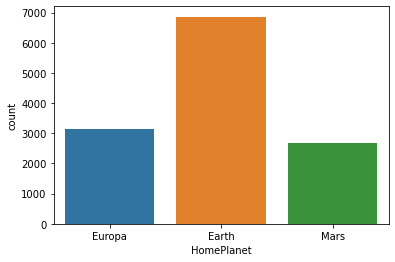

In [22]:
sns.countplot(titanic_data2['HomePlanet'])

In [23]:
HomePlanet_mode = titanic_data2['HomePlanet'].mode()[0]

In [24]:
titanic_data2['HomePlanet'].replace(np.nan, HomePlanet_mode, inplace = True)
titanic_data2['HomePlanet'].isnull().sum()

0

In [25]:
 titanic_data2['HomePlanet'].value_counts()

Earth     7153
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

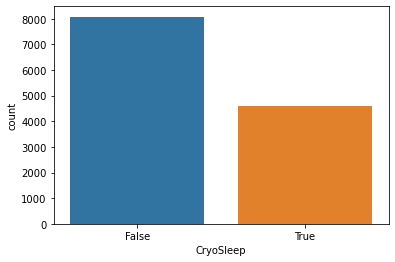

In [26]:
sns.countplot(titanic_data2['CryoSleep'])

In [27]:
CryoSleep_mode = titanic_data2['CryoSleep'].mode()[0]

In [28]:
titanic_data2['CryoSleep'].replace(np.nan, CryoSleep_mode, inplace = True)
titanic_data2['CryoSleep'].isnull().sum()

0

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

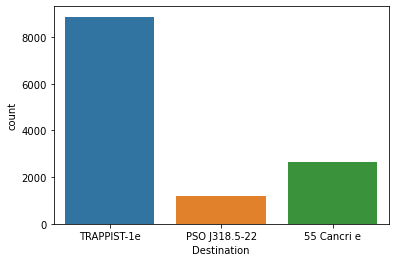

In [29]:
sns.countplot(titanic_data2['Destination'])

In [30]:
Destination_mode = titanic_data2['Destination'].mode()[0]

In [31]:
titanic_data2['Destination'].replace(np.nan, Destination_mode, inplace = True)
titanic_data2['Destination'].isnull().sum()

0

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VIP', ylabel='count'>

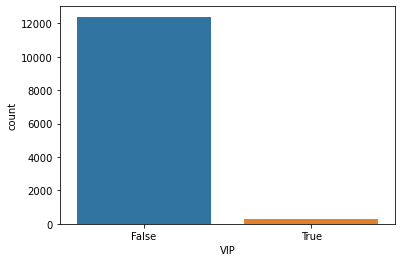

In [32]:
sns.countplot(titanic_data2['VIP'])

In [33]:
VIP_mode = titanic_data2['VIP'].mode()[0]

In [34]:
titanic_data2['VIP'].replace(np.nan, VIP_mode, inplace = True)
titanic_data2['VIP'].isnull().sum()

0

In [35]:
titanic_data2 = titanic_data2.drop(columns = ['Cabin','Name'],axis=1)

In [36]:
titanic_data2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [37]:
# Here the amount for luxury amenities can be 0 as some passengers did not used them.

In [38]:
RoomService_const = 0
titanic_data2["RoomService"].replace(np.nan, RoomService_const, inplace = True)
titanic_data2["RoomService"].isnull().sum()

0

In [39]:
FoodCourt_const = 0
titanic_data2["FoodCourt"].replace(np.nan, FoodCourt_const, inplace = True)
titanic_data2["FoodCourt"].isnull().sum()

0

In [40]:
ShoppingMall_const = 0
titanic_data2["ShoppingMall"].replace(np.nan, ShoppingMall_const, inplace = True)
titanic_data2["ShoppingMall"].isnull().sum()

0

In [41]:
Spa_const = 0
titanic_data2["Spa"].replace(np.nan, Spa_const, inplace = True)
titanic_data2["Spa"].isnull().sum()

0

In [42]:
VRDeck_const = 0
titanic_data2["VRDeck"].replace(np.nan, VRDeck_const, inplace = True)
titanic_data2["VRDeck"].isnull().sum()

0

In [43]:
Age_median = titanic_data2['Age'].median()

In [44]:
titanic_data2["Age"].replace(np.nan, Age_median, inplace = True)
titanic_data2["Age"].isnull().sum()

0

In [45]:
titanic_data2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [46]:
titanic_data2['Destination'].value_counts()

TRAPPIST-1e      9145
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [47]:
## encoding 

In [48]:
titanic_data2['HomePlanet'] = titanic_data2['HomePlanet'].replace({'Europa':1,'Earth':2,'Mars':3})
titanic_data2['CryoSleep'] = titanic_data2['CryoSleep'].replace({True:1,False:0})
titanic_data2['VIP'] = titanic_data2['VIP'].replace({True:1,False:0})
titanic_data2['Destination'] = titanic_data2['Destination'].replace({'TRAPPIST-1e':1,'55 Cancri e':2,'PSO J318.5-22':3})

In [49]:
titanic_data2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0001_01,1,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,False
0002_01,2,0,1,24.0,0,109.0,9.0,25.0,549.0,44.0,True
0003_01,1,0,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,1,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,2,0,1,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [50]:
titanic_data2['Transported'] = titanic_data2['Transported'].replace({True:1,False:0})

In [51]:
titanic_data2['CryoSleep'].value_counts()

0    8389
1    4581
Name: CryoSleep, dtype: int64

In [52]:
## Split data for training and testing

In [53]:
X_train = titanic_data2[:len_train].drop(columns = 'Transported')
y_train = titanic_data2[:len_train]['Transported']
X_test = titanic_data2[len_train:].drop(columns = 'Transported')

In [54]:
X_train.shape

(8693, 10)

In [55]:
X_test.shape

(4277, 10)

In [56]:
y_train.shape

(8693,)

In [57]:
## Train ML Model 

In [58]:
model = RandomForestClassifier()

In [59]:
model.fit(X_train,y_train)
y_train_predict = model.predict(X_train)
training_accuracy = accuracy_score(y_train_predict,y_train)

In [60]:
training_accuracy

0.9293684573795008

In [61]:
y_test_predict = model.predict(X_test)

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate =0.1,
                                max_depth=1,random_state=0)

In [106]:
clf.fit(X_train,y_train)
y_train_predict_clf = clf.predict(X_train)
training_accuracy_clf = accuracy_score(y_train_predict_clf,y_train)

In [110]:
y_test_predict_clf = clf.predict(X_test)

In [111]:
res = pd.DataFrame(y_test_predict_clf)
for i in res:
    for j in range(len(res)):
        if res[i][j]==1:
            res[i][j] = 'True'
        else:
            res[i][j] = 'False'
res.index = X_test.index
res.columns = ['Transported']
res.to_csv('C:/Users/Admin/Downloads/Transported.csv')